<a href="https://colab.research.google.com/github/Exanom/Shap_ConceptDirft_examples/blob/main/simple_CD_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Before running the code, upload DataStreamGenerator_modified.py to colab**

## In this example we'll use our own method to graph shap values

In [1]:
from DataStreamGenerator_modified import DataStreamGenerator

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
C = DataStreamGenerator(class_count=2, attribute_count=2, sample_count=10000, noise=False, redunce_variable=False)

In [4]:
DATASETS = [

    [C.Linear_Gradual_Rotation,'linear_gradual_rotation'],
    [C.Linear_Sudden_Rotation,'linear_sudden_rotation'],
    [C.Linear_Recurrent_Rotation,'linear_recurrent_rotation'],
    [C.Linear_Abrupt,'linear_abrupt'],
  ]
model = RandomForestClassifier()

In [5]:
dataset = DATASETS[0]
X,Y = dataset[0](dataset[1],False,True)

/content/DataStreamGenerator_modified.py:201: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, s=area0, c="hotpink", edgecolors="g", label="class0", cmap='viridis', alpha=0.7)
/content/DataStreamGenerator_modified.py:202: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, s=area1, c="#88c999", edgecolors="blue", label="class1", cmap='viridis', alpha=0.7)


<Figure size 640x480 with 0 Axes>

In [11]:
shaps = []
for i in range(10):
  start = (i*1000)
  end = 1000+start
  X_train, X_test, Y_train, Y_test = train_test_split(X[start:end],Y[start:end],test_size=0.3,
                                                	stratify =Y[start:end], random_state = 13)
  model.fit(X_train,Y_train)
  explainer = shap.TreeExplainer(model)
  explanation = explainer(X[start:end])
  #Calculate an average value for each feature, so in this example, we have only four final values per chunk, much easier to interpret

  #absolute of shap values, we must take into account that shap values can be both positive and negative, but even "low" negative values tell us about the information carried by the feature.
  avg = np.abs(explanation.values)
  #average for all samples
  avg = avg.mean(0)
  #print(avg)
  #average for all classes
  avg = avg.mean(1)
  shaps.append(avg)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [13]:
print("format:")
print("x   y")
for s in shaps:
  print("=========")

  print(s)

format:
x   y
[0.19472432 0.32478735]
[0.08677656 0.42378252]
[0.01666292 0.47394058]
[0.08519231 0.42575396]
[0.19297326 0.33400394]
[0.33352083 0.19108046]
[0.41752232 0.08796224]
[0.47930256 0.01479484]
[0.42597317 0.09002506]
[0.32500038 0.19536849]


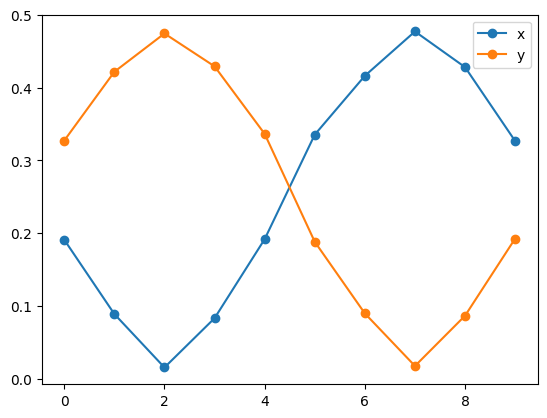

In [8]:
#By putting our values on a graph, we can see whether and where concept drift happened(Try it with abrupt CD)
df = pd.DataFrame(shaps)
df.columns = ['x', 'y']
for col in df.columns:
  plt.plot(range(len(df[col])),df[col], label=col, marker='o')
plt.legend()
plt.show()